In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [180]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [214]:
n=100
B=np.zeros((n,1))
A=np.zeros((n,n))

v=np.logspace(-10,np.log10(np.sqrt(24*1.602e-19/m)),n)
dv=v*((np.sqrt(24*1.602e-19/m)/1e-10)**(1/(n-1))-1)

In [215]:
def vm(v):
    return 5*n0*np.sqrt(2/m0)
def dvm(v):
    return 0

In [216]:
def a(v):
    return k*T0*vm(v)/m0 + q**2*E**2/(3*vm(v))
def b(v):
    return (k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2)
def c(v):
    return m*((2*v*vm(v)+v**2*dvm(v))*v + v**2*vm(v))/(m0*v**2)

In [220]:
def alpha(i):
    return a(v[i])/dv[i]**2
def beta(i):
    return -(2*a(v[i])/dv[i]**2+b(v[i])/dv[i])
def gamma(i):
    return a(v[i])/dv[i]**2+b(v[i])/dv[i]+c(v[i])

In [221]:
B[0,0]=1
B[1,0]=1

A[0,0]=1
A[1,1]=1
for i in range(2,n-1):
    A[i,i-2]=alpha(i)
    A[i,i-1]=beta(i)
    A[i,i]=gamma(i)
A[n-1,n-1]=1    
#print(A,np.matmul(np.linalg.inv(A),b))       

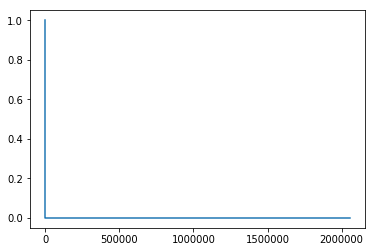

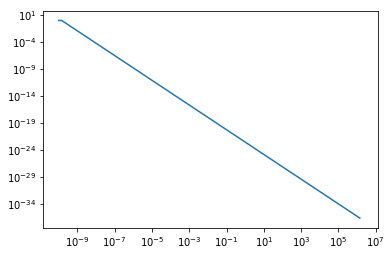

In [222]:
plt.plot(v,np.matmul(np.linalg.inv(A),B))
plt.show()
plt.loglog(v,np.matmul(np.linalg.inv(A),B))
plt.show()